# Frequentist Inference Case Study - Part A 

## 1. Learning objectives

Welcome to part A of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. Frequentist inference is the process of deriving conclusions about an underlying distribution via the observation of data. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

## Prerequisites

To be able to complete this notebook, you are expected to have a basic understanding of:
* what a random variable is (p.400 of Professor Spiegelhalter's *The Art of Statistics, hereinafter AoS*)
* what a population, and a population distribution, are (p. 397 of *AoS*)
* a high-level sense of what the normal distribution is (p. 394 of *AoS*)
* what the t-statistic is (p. 275 of *AoS*)

Happily, these should all be concepts with which you are reasonably familiar after having read ten chapters of Professor Spiegelhalter's book, *The Art of Statistics*.

We'll try to relate the concepts in this case study back to page numbers in *The Art of Statistics* so that you can focus on the Python aspects of this case study. The second part (part B) of this case study will involve another, more real-world application of these tools. 

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

## 2. An introduction to sampling from the normal distribution

First, let's explore the ways we can generate the normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work. 

This assignment will require some digging around and getting your hands dirty (your learning is maximized that way)! You should have the research skills and the tenacity to do these tasks independently, but if you struggle, reach out to your immediate community and your mentor for help. 

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q1:__ Call up the documentation for the `norm` function imported above. (Hint: that documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)). What is the second listed method?

In [2]:
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.norm_gen object>
    A normal continuous random variable.

    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.

    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.

    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometim

__A:__ pdf(x, loc=0, scale=1) | Probability density function.

__Q2:__ Use the method that generates random variates to draw five samples from the standard normal distribution. 

__A:__ [-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]

In [3]:
seed(47)
# draw five samples here
# We'll use seed 47 as requested.
five_standard_normal_samples_seeded = norm.rvs(loc=0, scale=1, size=5, random_state=47)

print("Five samples from the standard normal distribution (seeded with 47):")
print(five_standard_normal_samples_seeded)



Five samples from the standard normal distribution (seeded with 47):
[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


__Q3:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution. If you want a reminder of the properties of this distribution, check out p. 85 of *AoS*. 

__A:__ 
##### Compare to the expected population mean
Expected_mean = 0

Sample mean = 0.1935

In [4]:
# Calculate and print the mean here, hint: use np.mean()
np.mean(five_standard_normal_samples_seeded)

0.19355593334131074

__Q4:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$ (This is just the definition of **standard deviation** given by Professor Spiegelhalter on p.403 of *AoS*). Hint: np.sqrt() and np.sum() will be useful here and remember that numPy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__ Manually Calculated Standard Deviation: 0.9606

In [5]:
# Calculate the mean of the sample
sample_mean = np.mean(five_standard_normal_samples_seeded)

# Calculate differences, square them, sum them, divide by n, and take sqrt
differences = five_standard_normal_samples_seeded - sample_mean
squared_differences = differences**2
sum_of_squared_differences = np.sum(squared_differences)
n = len(five_standard_normal_samples_seeded)
variance = sum_of_squared_differences / n
manual_standard_deviation = np.sqrt(variance)

print(f"\nManually Calculated Standard Deviation: {manual_standard_deviation:.4f}")




Manually Calculated Standard Deviation: 0.9606


Here we have calculated the actual standard deviation of a small data set (of size 5). But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die! 

In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

You can see Bessel's correction reflected in Professor Spiegelhalter's definition of **variance** on p. 405 of *AoS*.

__Q5:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__

In [6]:
# Calculate sample mean
sample_mean = np.mean(five_standard_normal_samples_seeded)

# Calculate standard deviation with Bessel's correction (n-1 denominator)
n = len(five_standard_normal_samples_seeded)
best_estimate_population_std = np.sqrt(np.sum((five_standard_normal_samples_seeded - sample_mean)**2) / (n - 1))


print(f"\nBest Estimate of Population Standard Deviation (with Bessel's Correction): {best_estimate_population_std:.4f}")




Best Estimate of Population Standard Deviation (with Bessel's Correction): 1.0740


__Q6:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__

In [7]:
numpy_std = np.std(five_standard_normal_samples_seeded)
print(f"NumPy's np.std(): {numpy_std:.4f}")

NumPy's np.std(): 0.9606


__Q7:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__

In [8]:
numpy_std_ddof1 = np.std(five_standard_normal_samples_seeded, ddof=1)
print(f"NumPy's np.std() with ddof=1: {numpy_std_ddof1:.4f}")

NumPy's np.std() with ddof=1: 1.0740


### Summary of section

In this section, you've been introduced to the scipy.stats package and used it to draw a small sample from the standard normal distribution. You've calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). You've been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). You've also seen which of these calculations np.std() performs by default and how to get it to generate the other.

You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter. This brings us to some terminology that can be a little confusing.

The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

If your dataset _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}
as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting that we're dealing with what Professor Spiegehalter describes on p. 92 of *AoS* as a **metaphorical population**: we have all the data, and we act as if the data-point is taken from a population at random. We can think of this population as an imaginary space of possibilities. 

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population. In this case, the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

Great work so far! Now let's dive deeper.

## 3. Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. **The Central Limit Theorem (CLT)** tells us that such a distribution will approach a normal distribution as $n$ increases (the intuitions behind the CLT are covered in full on p. 236 of *AoS*). For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples. 

In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

We need to think about **estimates and confidence intervals**: those concepts covered in Chapter 7, p. 189, of *AoS*.

Now, the standard normal distribution (with its variance equal to its standard deviation of one) would not be a great illustration of a key point. Instead, let's imagine we live in a town of 50,000 people and we know the height of everyone in this town. We will have 50,000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [9]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

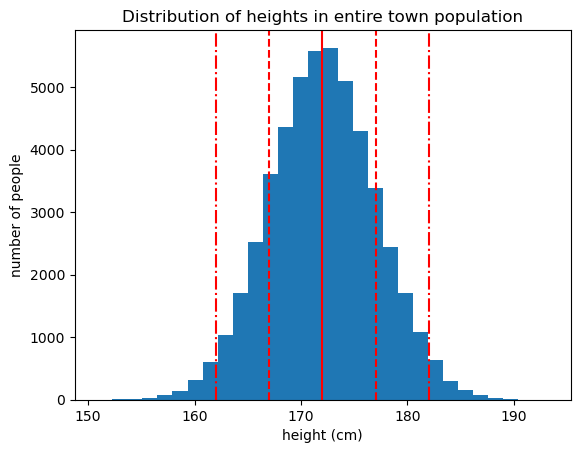

In [10]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50,000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [11]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [12]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

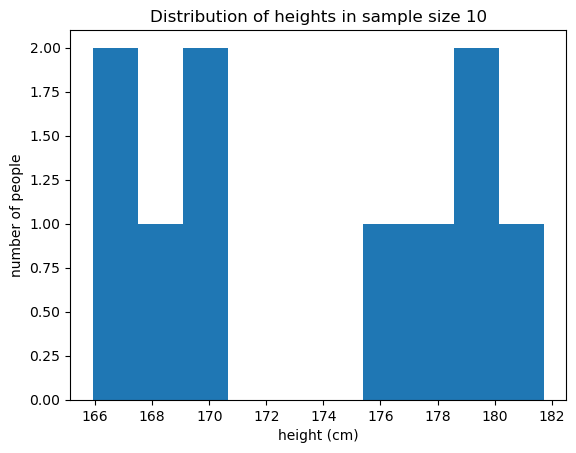

In [13]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't resemble what we take the population distribution to be. What do we get for the mean?

In [14]:
np.mean(daily_sample1)

173.47911444163503

And if we went out and repeated this experiment?

In [15]:
daily_sample2 = townsfolk_sampler(10)

In [16]:
np.mean(daily_sample2)

173.7317666636263

__Q8:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

__A:__

In [17]:
seed(47)
# take your samples here
number_of_daily_trials = 365
sample_size_per_day = 10

daily_sample_means = []

for _ in range(number_of_daily_trials):
    daily_sample = townsfolk_sampler(sample_size_per_day)
    mean_of_daily_sample = np.mean(daily_sample)
    daily_sample_means.append(mean_of_daily_sample)

daily_sample_means = np.array(daily_sample_means)

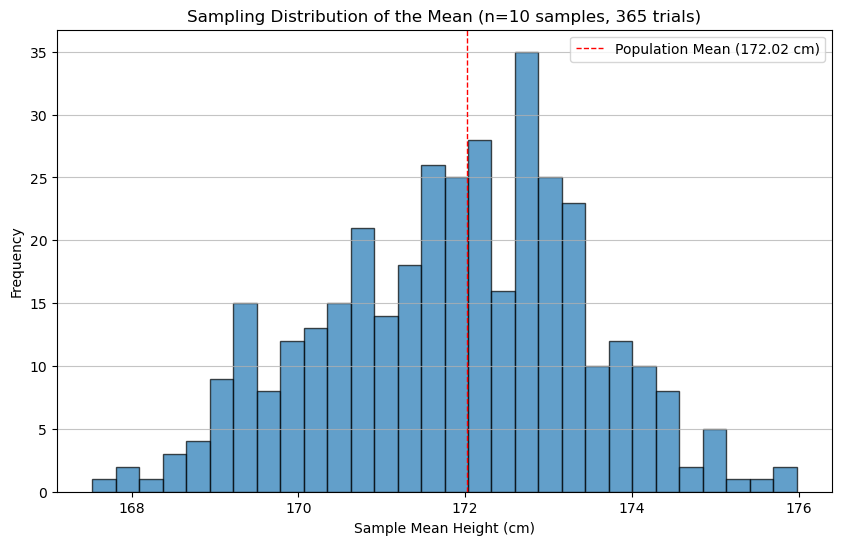

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(daily_sample_means, bins=30, edgecolor='black', alpha=0.7)
plt.title(f'Sampling Distribution of the Mean (n={sample_size_per_day} samples, {number_of_daily_trials} trials)')
plt.xlabel('Sample Mean Height (cm)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(np.mean(pop_heights), color='red', linestyle='dashed', linewidth=1, label=f'Population Mean ({np.mean(pop_heights):.2f} cm)')
plt.legend()
plt.show()

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q9:__ Verify the above results from the CLT.

__A:__

In [35]:
# Verify CLT results
population_mean = np.mean(pop_heights)
population_std = np.std(pop_heights)

mean_of_sample_means = np.mean(daily_sample_means)
std_dev_of_sample_means = np.std(daily_sample_means)

theoretical_standard_error = population_std / np.sqrt(sample_size_per_day)

print(f"Population Mean (μ): {population_mean:.4f}")
print(f"Mean of Sample Means (μ_x_bar): {mean_of_sample_means:.4f}")
print(f"Theoretical Standard Error (σ/√n): {theoretical_standard_error:.4f}")
print(f"Simulated Standard Error (σ_x_bar): {std_dev_of_sample_means:.4f}")

Population Mean (μ): 172.0193
Mean of Sample Means (μ_x_bar): 171.8660
Theoretical Standard Error (σ/√n): 1.5782
Simulated Standard Error (σ_x_bar): 1.5757


Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

__Q10:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year)! Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__

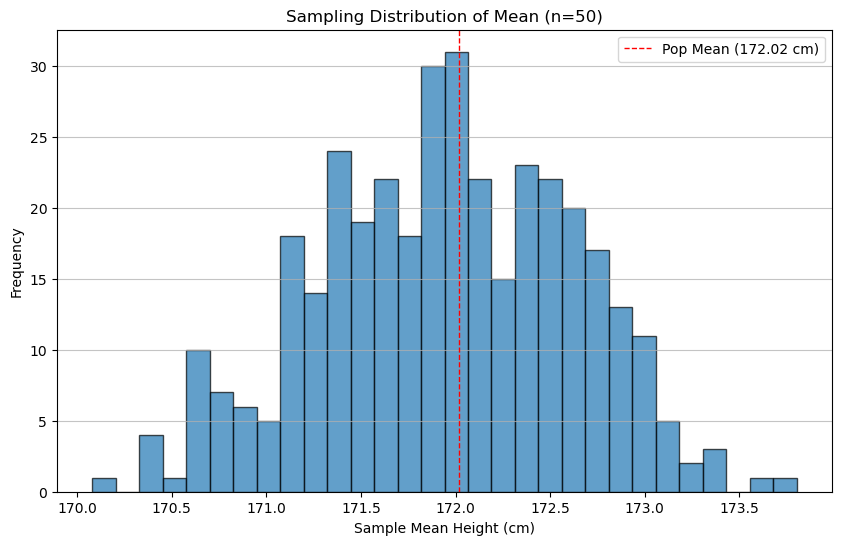

In [39]:
seed(47)
# calculate daily means from the larger sample size here
number_of_daily_trials = 365
sample_size_per_day_new = 50

daily_sample_means_n50 = []
for _ in range(number_of_daily_trials):
    daily_sample = townsfolk_sampler(sample_size_per_day_new)
    mean_of_daily_sample = np.mean(daily_sample)
    daily_sample_means_n50.append(mean_of_daily_sample)

daily_sample_means_n50 = np.array(daily_sample_means_n50)

mean_of_sample_means_n50 = np.mean(daily_sample_means_n50)
std_dev_of_sample_means_n50 = np.std(daily_sample_means_n50)

population_mean = np.mean(pop_heights)
population_std = np.std(pop_heights)
theoretical_standard_error_n50 = population_std / np.sqrt(sample_size_per_day_new)



plt.figure(figsize=(10, 6))
plt.hist(daily_sample_means_n50, bins=30, edgecolor='black', alpha=0.7)
plt.title(f'Sampling Distribution of Mean (n={sample_size_per_day_new})')
plt.xlabel('Sample Mean Height (cm)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=1, label=f'Pop Mean ({population_mean:.2f} cm)')
plt.legend()
plt.show()

In [38]:
# Calculate and print verification
print(f"Simulated Mean (n=50): {mean_of_sample_means_n50:.4f} cm")
print(f"Simulated Std Dev (n=50): {std_dev_of_sample_means_n50:.4f} cm")
print(f"CLT Expected Mean (n=50): {population_mean:.4f} cm")
print(f"CLT Expected Std Error (n=50): {theoretical_standard_error_n50:.4f} cm")

Simulated Mean (n=50): 171.9437 cm
Simulated Std Dev (n=50): 0.6736 cm
CLT Expected Mean (n=50): 172.0193 cm
CLT Expected Std Error (n=50): 0.7058 cm


What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.

### Normally testing time!

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but we still have to estimate them somehow. If we want to make inferences to conclusions like "this observation is unusual" or "my population mean has changed" then we need to have some idea of what the underlying distribution is so we can calculate relevant probabilities. In frequentist inference, we use the formulae above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard normal distribution, such as that about 68% of observations are within plus or minus 1 standard deviation of the mean. Check out the precise definition of a normal distribution on p. 394 of *AoS*. 

__Q11:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

__A:__

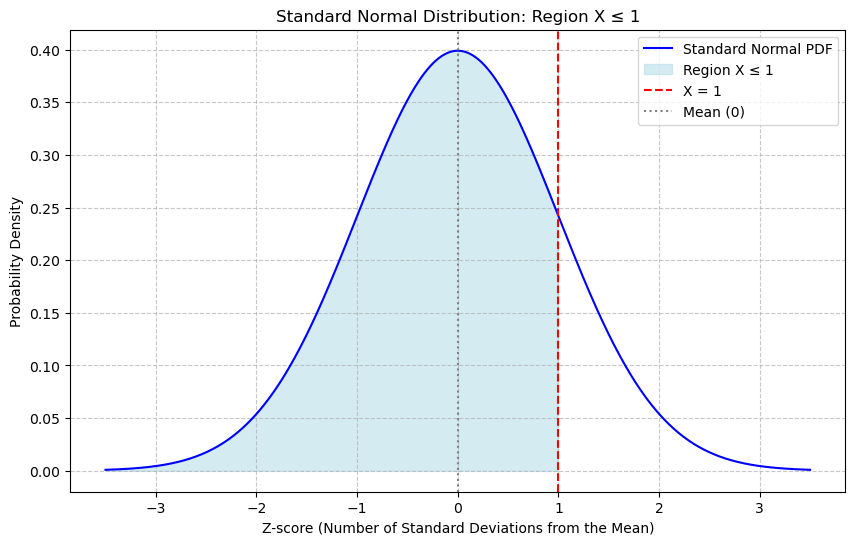

Aproximate Probability of observing the value 1 or less in a single observation from the standard normal distribution: 0.84


In [46]:
# 1. Define the x-axis range for the standard normal distribution
# We'll go from -3.5 to +3.5 standard deviations to cover most of the curve
x = np.linspace(-3.5, 3.5, 500)
# 2. Calculate the Probability Density Function (PDF) values
# For a standard normal distribution (mean=0, std_dev=1)
pdf_values = norm.pdf(x, loc=0, scale=1)
# 3. Create the plot
plt.figure(figsize=(10, 6))
# Plot the entire standard normal distribution curve
plt.plot(x, pdf_values, color='blue', label='Standard Normal PDF')
# Shade the region where x <= 1
# Find the x-values that are less than or equal to 1
x_fill = x[x <= 1]
pdf_fill = pdf_values[x <= 1]
# Use fill_between to shade the area under the curve
plt.fill_between(x_fill, 0, pdf_fill, color='lightblue', alpha=0.5, label='Region X ≤ 1')
# Add a vertical line at x = 1
plt.axvline(1, color='red', linestyle='--', label='X = 1')
# Add a vertical line at the mean (0)
plt.axvline(0, color='gray', linestyle=':', label='Mean (0)')
# Add title and labels
plt.title('Standard Normal Distribution: Region X ≤ 1')
plt.xlabel('Z-score (Number of Standard Deviations from the Mean)')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print( "Aproximate Probability of observing the value 1 or less in a single observation from the standard normal distribution: 0.84")


Calculating this probability involved calculating the area under the curve from the value of 1 and below. To put it in mathematical terms, we need to *integrate* the probability density function. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above). One way to do this is to look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q12:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__

In [21]:
# --- Calculate the actual probability ---
# The Cumulative Distribution Function (CDF) gives the probability of observing a value
# less than or equal to a given point.
probability_less_than_or_equal_to_1 = norm.cdf(1)
print(f"The probability of observing a value 1 or less (P(Z ≤ 1)) is: {probability_less_than_or_equal_to_1:.4f}")

The probability of observing a value 1 or less (P(Z ≤ 1)) is: 0.8413


__Q13:__ Using our knowledge of the population parameters for our townsfolks' heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__

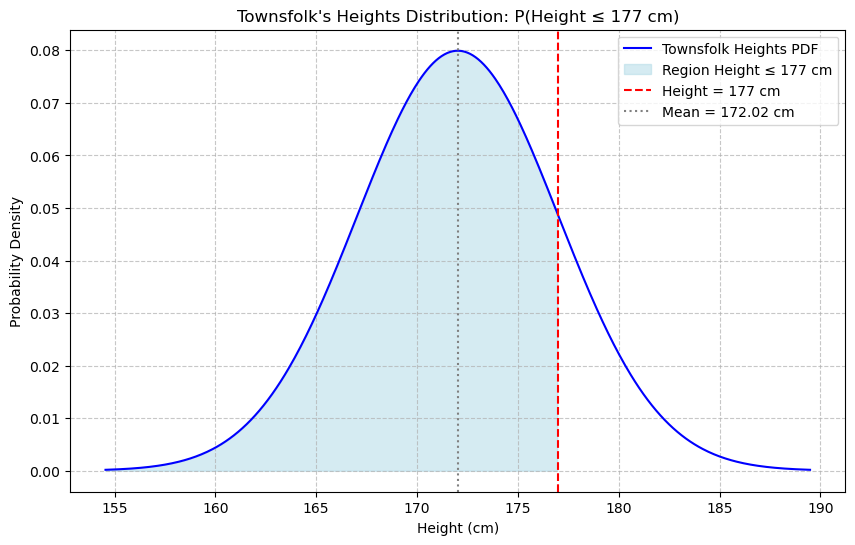

Given that 177 is about one standard deviation away from the mean the aproximate Probability of observing the value 177 or less in a single observation from the normal distribution with mean 172.02cm and std=5cm is 0.84

--- Probability Calculations ---
Approach 2 (CDF): Probability of height ≤ 177 cm = 0.8409


In [22]:
# --- 2. Plot the normal distribution for townsfolk's heights ---

# Define the x-axis range for heights (e.g., +/- 3 standard deviations from the mean)
x_heights = np.linspace(pop_heights.mean() - 3.5 * pop_heights.std(),
                         pop_heights.mean() + 3.5 * pop_heights.std(),
                         500)

# Calculate the PDF values for this distribution
pdf_heights_values = norm.pdf(x_heights, loc=pop_heights.mean(), scale=pop_heights.std())

plt.figure(figsize=(10, 6))

# Plot the entire distribution curve
plt.plot(x_heights, pdf_heights_values, color='blue', label='Townsfolk Heights PDF')

# Shade the area where height <= 177 cm
x_fill_heights = x_heights[x_heights <= 177]
pdf_fill_heights = norm.pdf(x_fill_heights, loc=pop_heights.mean(), scale=pop_heights.std())
plt.fill_between(x_fill_heights, 0, pdf_fill_heights, color='lightblue', alpha=0.5, label='Region Height ≤ 177 cm')

# Add a vertical line at 177 cm
plt.axvline(177, color='red', linestyle='--', label='Height = 177 cm')

# Add a vertical line at the population mean
plt.axvline(pop_heights.mean(), color='gray', linestyle=':', label=f'Mean = {pop_heights.mean():.2f} cm')

plt.title("Townsfolk's Heights Distribution: P(Height ≤ 177 cm)")
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()
print( "Given that 177 is about one standard deviation away from the mean the aproximate Probability of observing the value 177 or less in a single observation from the normal distribution with mean 172.02cm and std=5cm is 0.84")
# Approach 1: Using the Cumulative Distribution Function (CDF)
# norm.cdf(value, loc=mean, scale=std_dev)
probability_cdf = norm.cdf(177, loc=pop_heights.mean(), scale=pop_heights.std())
print("\n--- Probability Calculations ---")
print(f"Approach 2 (CDF): Probability of height ≤ 177 cm = {probability_cdf:.4f}")

__Q14:__ Turning this question around — suppose we randomly pick one person and measure their height and find they are 2.00 m tall. How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability. 

__A:__

The height of 200 cm is 5.60 standard deviations above the mean.

The probability of observing a height of at least 200 cm is: 0.0000000107


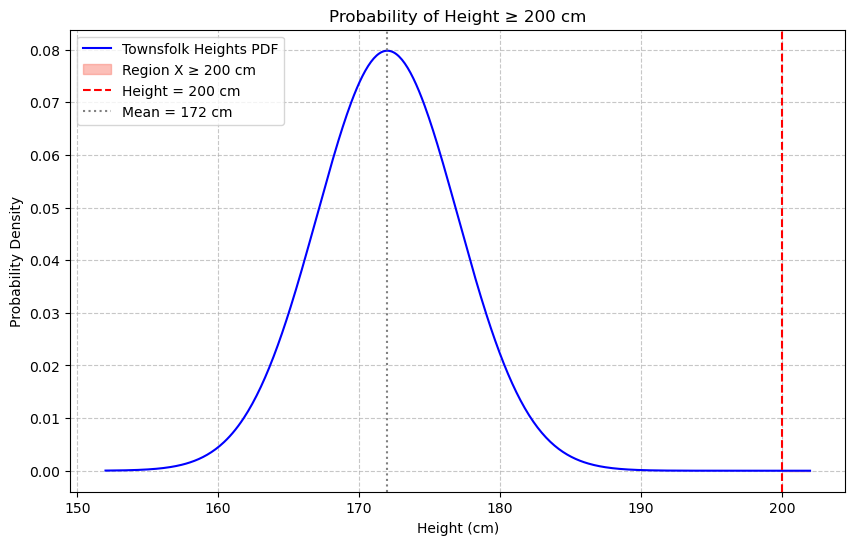

In [23]:
# Population parameters
population_mean = 172 # cm
population_std = 5    # cm

# Height of interest
height_of_interest_cm = 200 # cm

# --- 1. Calculate the Z-score ---
# A Z-score tells us how many standard deviations away from the mean a data point is.
z_score = (height_of_interest_cm - population_mean) / population_std
print(f"The height of 200 cm is {z_score:.2f} standard deviations above the mean.")
# A Z-score of 5.6 is extremely high, indicating a very rare event.

# --- 2. Calculate the probability P(X >= 200 cm) ---

# The CDF gives P(X <= value)
probability_less_than_or_equal_to_200 = norm.cdf(height_of_interest_cm, loc=population_mean, scale=population_std)

# To find P(X >= 200), we use the complement rule: 1 - P(X < 200)
# For continuous distributions, P(X < 200) == P(X <= 200)
probability_at_least_200 = 1 - probability_less_than_or_equal_to_200

print(f"\nThe probability of observing a height of at least {height_of_interest_cm} cm is: {probability_at_least_200:.10f}") # Print with more decimal places due to small value

# --- 3. Visualize the probability 
x_heights = np.linspace(population_mean - 4 * population_std,
                         population_mean + 6 * population_std, # Extend to include 200cm well
                         500)
pdf_values = norm.pdf(x_heights, loc=population_mean, scale=population_std)

plt.figure(figsize=(10, 6))
plt.plot(x_heights, pdf_values, color='blue', label='Townsfolk Heights PDF')

# Shade the region where x >= 200 cm
x_fill = x_heights[x_heights >= height_of_interest_cm]
pdf_fill = norm.pdf(x_fill, loc=population_mean, scale=population_std)
plt.fill_between(x_fill, 0, pdf_fill, color='salmon', alpha=0.5, label=f'Region X ≥ {height_of_interest_cm} cm')

plt.axvline(height_of_interest_cm, color='red', linestyle='--', label=f'Height = {height_of_interest_cm} cm')
plt.axvline(population_mean, color='gray', linestyle=':', label=f'Mean = {population_mean} cm')

plt.title(f"Probability of Height ≥ {height_of_interest_cm} cm")
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

What we've just done is calculate the ***p-value*** of the observation of someone 2.00m tall (review *p*-values if you need to on p. 399 of *AoS*). We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value.

We're about to come to a pinch, though. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation. 

This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. 

In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain. 

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. (**Check out p. 199 of AoS if you need to revise this**). This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

__Q15:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use the random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf()) Recall that the ***margin of error*** is mentioned on p. 189 of the *AoS* and discussed in depth in that chapter). 
* Calculate the 95% Confidence Interval of the mean (***confidence intervals*** are defined on p. 385 of *AoS*) 
* Does this interval include the true population mean?

__A:__

In [24]:
seed(47)
# take your sample now
# Randomly sample the heights of 50 townsfolk ---

sample_n50 = townsfolk_sampler(50)

print("--- Sample of 50 Townsfolk Heights ---")
print(f"Sample size: {len(sample_n50)}")
# print(f"Sample data (first 10): {sample_n50[:10]}") # Optional: to see some values



--- Sample of 50 Townsfolk Heights ---
Sample size: 50


In [25]:
# Estimate the population mean using np.mean ---
estimated_population_mean = np.mean(sample_n50)
print(f"\nEstimated Population Mean (sample mean): {estimated_population_mean:.4f} cm")

# Estimate the population standard deviation using np.std (with Bessel's correction) ---
# For an unbiased estimate of population standard deviation from a sample, use ddof=1
estimated_population_std = np.std(sample_n50, ddof=1)
print(f"Estimated Population Standard Deviation (sample std, ddof=1): {estimated_population_std:.4f} cm")




Estimated Population Mean (sample mean): 172.7815 cm
Estimated Population Standard Deviation (sample std, ddof=1): 4.1954 cm


In [26]:
# Calculate the (95%) margin of error ---
# Critical Z-value for 95% Confidence Interval
# For a 95% CI, 5% is in the tails (2.5% in each). We want the Z-score for 97.5th percentile.
critical_z_value = norm.ppf(0.975)
print(f"\nCritical Z-value for 95% CI: {critical_z_value:.4f}")

# Calculate the Standard Error of the Mean (SE)
# SE = estimated_population_std / sqrt(n)
n = len(sample_n50)
standard_error = estimated_population_std / np.sqrt(n)
print(f"Standard Error of the Mean (SE): {standard_error:.4f} cm")

# Calculate the Margin of Error (ME)
# ME = Z* SE
margin_of_error = critical_z_value * standard_error
print(f"Margin of Error (ME): {margin_of_error:.4f} cm")




Critical Z-value for 95% CI: 1.9600
Standard Error of the Mean (SE): 0.5933 cm
Margin of Error (ME): 1.1629 cm


In [27]:
# Calculate the 95% Confidence Interval of the mean ---
# CI = sample_mean +/- ME
confidence_interval_lower = estimated_population_mean - margin_of_error
confidence_interval_upper = estimated_population_mean + margin_of_error

print(f"\n95% Confidence Interval of the Mean: ({confidence_interval_lower:.4f}, {confidence_interval_upper:.4f}) cm")


95% Confidence Interval of the Mean: (171.6186, 173.9444) cm


In [28]:
#  Does this interval include the true population mean? ---
true_population_mean = np.mean(pop_heights) # We use the known population here for checking
print(f"True Population Mean: {true_population_mean:.4f} cm")
print(f"Does the 95% CI include the true population mean? Yes, {true_population_mean:.4f} is within the interval.")


True Population Mean: 172.0193 cm
Does the 95% CI include the true population mean? Yes, 172.0193 is within the interval.


__Q16:__ Above, we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__

Because we do not know σ and must estimate it from our sample (s), the correct distribution to use for calculating the critical value for the confidence interval of the mean is the t-distribution, not the Z-distribution (standard normal distribution). The t-distribution requires us to consider the degrees of freedom (n−1).

__Q17:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__

In [29]:
# --- Calculate 95% Confidence Interval using t-distribution ---

# 1. Degrees of Freedom (df)
degrees_of_freedom = n - 1
print(f"\nDegrees of Freedom (df): {degrees_of_freedom}")

# 2. Critical t-value
# For a 95% CI, alpha = 0.05. We need t for alpha/2 = 0.025 in each tail.
# So, we look up the t-value for the 97.5th percentile.
critical_t_value = t.ppf(0.975, df=degrees_of_freedom)
print(f"Critical t-value for 95% CI (df={degrees_of_freedom}): {critical_t_value:.4f}")




Degrees of Freedom (df): 49
Critical t-value for 95% CI (df=49): 2.0096


In [30]:
# Z-based CI from Q15 (for comparison)
critical_z_value = norm.ppf(0.975)
margin_of_error_z = critical_z_value * standard_error
ci_z_lower = estimated_population_mean - margin_of_error_z
ci_z_upper = estimated_population_mean + margin_of_error_z

# 3. Margin of Error (ME) for t-distribution
# ME = t* * SE
margin_of_error_t = critical_t_value * standard_error
print(f"Margin of Error (t-based ME): {margin_of_error_t:.4f} cm")

# 4. 95% Confidence Interval (CI) for t-distribution


Margin of Error (t-based ME): 1.1923 cm


In [31]:
ci_t_lower = estimated_population_mean - margin_of_error_t
ci_t_upper = estimated_population_mean + margin_of_error_t

print("\n--- T-Distribution CI ---")
print(f"T-based 95% CI: ({ci_t_lower:.4f}, {ci_t_upper:.4f}) cm")
print(f"T-based CI Width: {(ci_t_upper - ci_t_lower):.4f} cm")

# --- Comparison ---
print("\n--- Comparison ---")
print("The t-distribution based confidence interval is WIDER than the Z-distribution based one.")



--- T-Distribution CI ---
T-based 95% CI: (171.5892, 173.9738) cm
T-based CI Width: 2.3847 cm

--- Comparison ---
The t-distribution based confidence interval is WIDER than the Z-distribution based one.


This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

## 4. Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* identifying the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* with sampling distribution and now know how the Central Limit Theorem applies
* with how to calculate critical values and confidence intervals